In [412]:
input_size=3
layers=[4,3]
output_size=2

In [413]:
import numpy as np

In [414]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [415]:
#a=[[10,10]]
#ans=softmax(a)

In [416]:
#print(ans)

In [417]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        
        model['w1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        model['w2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        model['w3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        
    def forward(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,w1) + b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2) + b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3) + b3
        y_=softmax(z3)
        #print(y_[:100])
        
        self.activation_outputs=(a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_=self.activation_outputs
        
        delta3=y_ - y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        self.model['w1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['w2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['w3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def output_predict(self,x):
        y_ = self.forward(x)
        return np.argmax(y_,axis=1)
    
    def summary(self):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        (a1,a2,y_)=self.activation_outputs
        
        print("W1:",w1.shape)
        print("A1:",a1.shape)
        
        print("W2:",w2.shape)
        print("A2:",a2.shape)
        
        print("W3:",w3.shape)
        print("Y_:",y_.shape)
        
   

In [418]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
    
def ohvector(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))                         #depth is no. of classes
    y_oht[np.arange(m),y]=1
    return y_oht
        

In [419]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

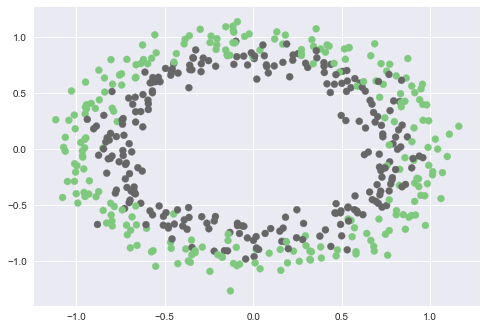

In [420]:
x,y=make_circles(n_samples=500,noise=0.09,random_state=1,shuffle=True,factor=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [421]:
def train(x,y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    
    classes=2
    y_oht=ohvector(y,classes)
    
    for ix in range(epochs):
        y_=model.forward(x)
        l=loss(y_oht,y_)
        model.backward(x,y_oht,learning_rate)
        training_loss.append(l)
        
        if(logs):
            print("Epoch %d Loss %4f"%(ix,l))
    
    return training_loss


In [422]:
model=NeuralNetwork(input_size=2,layers=[20,12],output_size=2)
model.forward(x)
model.summary()


W1: (2, 20)
A1: (500, 20)
W2: (20, 12)
A2: (500, 12)
W3: (12, 2)
Y_: (500, 2)


Epoch 0 Loss 1.020721
Epoch 1 Loss 0.519581
Epoch 2 Loss 0.720190
Epoch 3 Loss 0.825823
Epoch 4 Loss 0.774398
Epoch 5 Loss 0.434981
Epoch 6 Loss 0.411287
Epoch 7 Loss 0.459537
Epoch 8 Loss 0.524826
Epoch 9 Loss 0.474765
Epoch 10 Loss 0.477180
Epoch 11 Loss 0.438521
Epoch 12 Loss 0.433081
Epoch 13 Loss 0.419907
Epoch 14 Loss 0.413312
Epoch 15 Loss 0.407988
Epoch 16 Loss 0.400102
Epoch 17 Loss 0.397973
Epoch 18 Loss 0.390156
Epoch 19 Loss 0.389453
Epoch 20 Loss 0.382381
Epoch 21 Loss 0.382179
Epoch 22 Loss 0.375955
Epoch 23 Loss 0.375837
Epoch 24 Loss 0.370408
Epoch 25 Loss 0.370235
Epoch 26 Loss 0.365526
Epoch 27 Loss 0.365270
Epoch 28 Loss 0.361201
Epoch 29 Loss 0.360863
Epoch 30 Loss 0.357355
Epoch 31 Loss 0.356942
Epoch 32 Loss 0.353923
Epoch 33 Loss 0.353439
Epoch 34 Loss 0.350848
Epoch 35 Loss 0.350295
Epoch 36 Loss 0.348081
Epoch 37 Loss 0.347455
Epoch 38 Loss 0.345577
Epoch 39 Loss 0.344871
Epoch 40 Loss 0.343296
Epoch 41 Loss 0.342500
Epoch 42 Loss 0.341200
Epoch 43 Loss 0.34030

Epoch 355 Loss 0.212434
Epoch 356 Loss 0.207521
Epoch 357 Loss 0.211834
Epoch 358 Loss 0.207005
Epoch 359 Loss 0.211209
Epoch 360 Loss 0.206484
Epoch 361 Loss 0.210598
Epoch 362 Loss 0.205985
Epoch 363 Loss 0.210030
Epoch 364 Loss 0.205523
Epoch 365 Loss 0.209514
Epoch 366 Loss 0.205101
Epoch 367 Loss 0.209041
Epoch 368 Loss 0.204706
Epoch 369 Loss 0.208591
Epoch 370 Loss 0.204318
Epoch 371 Loss 0.208138
Epoch 372 Loss 0.203922
Epoch 373 Loss 0.207665
Epoch 374 Loss 0.203505
Epoch 375 Loss 0.207162
Epoch 376 Loss 0.203065
Epoch 377 Loss 0.206633
Epoch 378 Loss 0.202608
Epoch 379 Loss 0.206089
Epoch 380 Loss 0.202147
Epoch 381 Loss 0.205547
Epoch 382 Loss 0.201691
Epoch 383 Loss 0.205020
Epoch 384 Loss 0.201251
Epoch 385 Loss 0.204517
Epoch 386 Loss 0.200830
Epoch 387 Loss 0.204038
Epoch 388 Loss 0.200427
Epoch 389 Loss 0.203579
Epoch 390 Loss 0.200035
Epoch 391 Loss 0.203131
Epoch 392 Loss 0.199647
Epoch 393 Loss 0.202682
Epoch 394 Loss 0.199255
Epoch 395 Loss 0.202226
Epoch 396 Loss 0

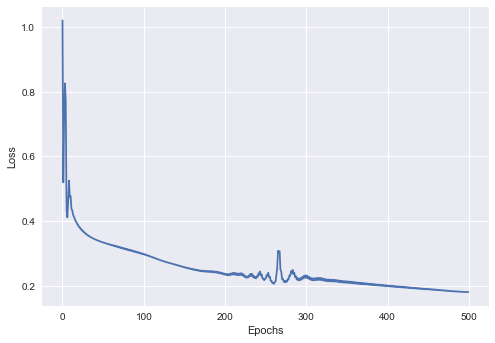

In [423]:
losses=train(x,y,model,500,0.001)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [424]:
from visualize import plot_decision_boundary

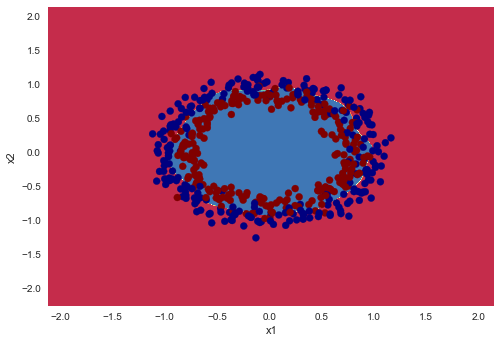

In [425]:
plot_decision_boundary(lambda x:model.output_predict(x),x,y)

In [426]:
outputs=model.output_predict(x)
training_accuracy=np.sum(outputs==y)/y.shape[0]
print("Training Accuracy : %4f"%(training_accuracy*100))


Training Accuracy : 85.200000


# XOR DATASET

In [427]:
x_new=np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])
y_new=np.array([0,1,1,0])
losses_new=train(x_new,y_new,model,200,0.008)

Epoch 0 Loss 1.556736
Epoch 1 Loss 1.482640
Epoch 2 Loss 1.418885
Epoch 3 Loss 1.357673
Epoch 4 Loss 1.294980
Epoch 5 Loss 1.227842
Epoch 6 Loss 1.154395
Epoch 7 Loss 1.075615
Epoch 8 Loss 0.996707
Epoch 9 Loss 0.923759
Epoch 10 Loss 0.858441
Epoch 11 Loss 0.798764
Epoch 12 Loss 0.742759
Epoch 13 Loss 0.689911
Epoch 14 Loss 0.640789
Epoch 15 Loss 0.596147
Epoch 16 Loss 0.556281
Epoch 17 Loss 0.520937
Epoch 18 Loss 0.489548
Epoch 19 Loss 0.461486
Epoch 20 Loss 0.436196
Epoch 21 Loss 0.413227
Epoch 22 Loss 0.392230
Epoch 23 Loss 0.372934
Epoch 24 Loss 0.355122
Epoch 25 Loss 0.338616
Epoch 26 Loss 0.323266
Epoch 27 Loss 0.308939
Epoch 28 Loss 0.295514
Epoch 29 Loss 0.282881
Epoch 30 Loss 0.270935
Epoch 31 Loss 0.259580
Epoch 32 Loss 0.248727
Epoch 33 Loss 0.238293
Epoch 34 Loss 0.228210
Epoch 35 Loss 0.218421
Epoch 36 Loss 0.208892
Epoch 37 Loss 0.199611
Epoch 38 Loss 0.190595
Epoch 39 Loss 0.181884
Epoch 40 Loss 0.173538
Epoch 41 Loss 0.165619
Epoch 42 Loss 0.158183
Epoch 43 Loss 0.15126

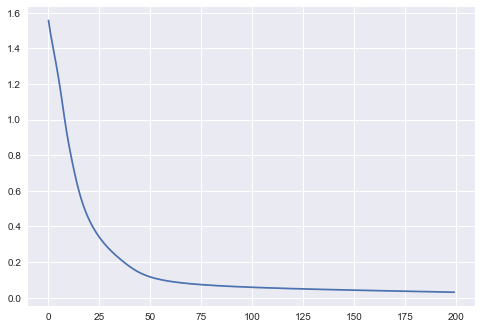

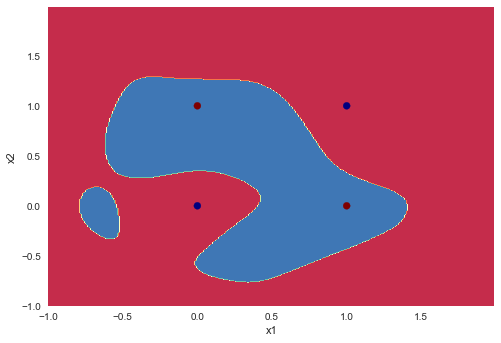

In [428]:
plt.plot(losses_new)
plt.show()
plot_decision_boundary(lambda x_new:model.output_predict(x_new),x_new,y_new)

In [429]:
outputs_new=model.output_predict(x_new)
training_accuracynew=np.sum(outputs_new==y_new)/y_new.shape[0]
print("Training Accuracy : %4f"%(training_accuracynew*100))


Training Accuracy : 100.000000
